# Projeto Programming - Regressão Linear

Regressão Linear Simples : f_wb = w * x + b

Regressão Linear Múltipla: f_wb = $\overrightarrow{w}$ . $\overrightarrow{x}$ + b

## Criação do dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_dataset(n_points, dimensions = 2, mean = 5, std_dev = 0.25):
    """Vai dar retorno a um dataset de vertical stack vetores com (n_points) data points 
    e (dimensions) colunas"""

    points = np.random.normal(loc= mean, scale= std_dev, size= (n_points, dimensions))        

    return np.vstack(points)

In [4]:
# Exemplo de criação de um dataset com 150 pontos e 2 colunas (1 coluna para a feature e outra para a label)

dataset = generate_dataset(150, dimensions = 2)

dataset

array([[4.89477848, 4.94203675],
       [4.92167869, 4.5486106 ],
       [4.78789423, 5.05584475],
       [4.74564285, 5.04604368],
       [4.95996979, 4.87751658],
       [5.06322919, 4.55231274],
       [4.88642086, 4.73443938],
       [4.68522639, 5.0347782 ],
       [5.37771396, 4.64677092],
       [4.60328387, 4.75728389],
       [5.14081419, 5.21621242],
       [4.98903627, 5.33756639],
       [5.18752759, 4.66261779],
       [4.68800775, 5.09427891],
       [4.97610312, 4.72310563],
       [5.16579072, 5.45450508],
       [5.23080204, 5.00123891],
       [5.16515856, 4.77542484],
       [4.59367883, 4.48773027],
       [4.98486141, 5.51657268],
       [4.91467922, 5.21852398],
       [5.13471544, 4.79751981],
       [4.7929397 , 5.1896113 ],
       [4.87569562, 4.63887274],
       [5.00319215, 4.97260584],
       [5.19392518, 5.12080145],
       [4.92384893, 5.31865603],
       [4.59883046, 4.52710706],
       [5.48233494, 4.9703115 ],
       [4.81428156, 5.15324905],
       [4.

## Iniciação da Regressão

In [5]:
def initial_lin_reg(x, y):

    b = np.random.uniform(1, 3)

    if x.ndim == 1:                                         # Se definirmos apenas 1 feature

        w = np.random.uniform(0, 1)                         # Gerar coeficiente de w de 0 ou 1

        y_hats = w * x + b                                  # Fazer previsões de y dado o w e b definidos acima

        plt.scatter(x, y)
        plt.plot(x, y_hats, color = 'red', label='Regressão Inicial')
        print(f'A representação inicial de y_hat = {w} x + {b}')

    else:                                                   # Se definirmos mais do que 1 feature no modelo

        w = np.random.randint(0,1,x.shape[1])               # Gerar coeficientes de w de 0 a 1 para cada feature

        y_hats = np.dot(x, w) + b

        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'A representação inicial de y_hat = {formula_regressao} + {b}')

    return w, b

A representação inicial de y_hat = 0.48270792939329843 x + 2.3699096708262046


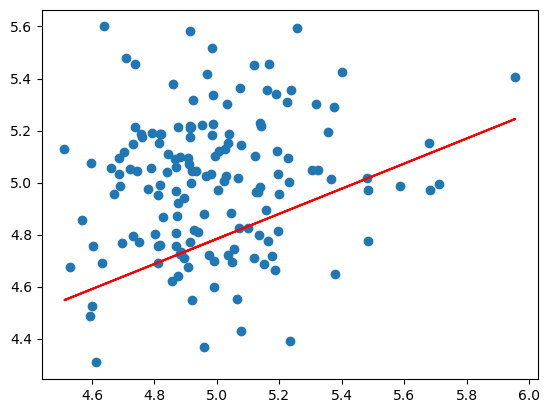

In [6]:
# Exemplo para testar a função initial_lin_reg


# x, y, w, b = initial_lin_reg(dataset[:, :-1], dataset[:, -1])           # Caso tenhamos + do que 1 feature

w, b = initial_lin_reg(dataset[:,0], dataset[:,1])                # Caso tenhamos apenas 1 feature

## Definição da função de custo - Mean Squared Error Function

In [7]:
def cost_function(x, y, w, b):

    m = len(x)                                              # Número de data points

    if x.ndim == 1:
        
        y_hats = w * x + b                                  # Previsões de y caso a regressão seja simples
    
    else:

        y_hats = np.dot(x, w) + b                           # Previsões de y caso a regressão seja múltipla    

    cost = (1/(2*m)) * np.sum((y_hats - y) ** 2)            # Função custo

    return y_hats, cost

In [8]:
y_hats, cost = cost_function(dataset[:,0], dataset[:,1], w, b)
y_hats, cost

(array([4.73265805, 4.745643  , 4.68106418, 4.66066911, 4.76412642,
        4.81397055, 4.72862376, 4.6315056 , 4.96577484, 4.5919513 ,
        4.85142145, 4.77815704, 4.87397037, 4.63284818, 4.77191411,
        4.86347781, 4.89485929, 4.86317267, 4.58731487, 4.7761418 ,
        4.7422643 , 4.84847753, 4.68349967, 4.72344661, 4.78499019,
        4.87705854, 4.74669059, 4.5898016 , 5.01627622, 4.69380156,
        4.74570014, 4.80074167, 4.85688072, 5.01769078, 4.54789739,
        4.69181452, 4.63383874, 4.80680465, 4.86025066, 4.81944024,
        4.89339487, 4.77370572, 4.69527748, 4.96011173, 4.64354568,
        4.75356671, 4.71416237, 4.7668285 , 5.24461022, 4.72395147,
        4.80192849, 4.64876715, 4.79957205, 4.73896053, 4.85927346,
        4.69209314, 4.57463849, 4.96483948, 4.7006743 , 4.80076332,
        5.11158533, 4.84073161, 4.77922614, 4.95551954, 4.79480783,
        5.11350876, 4.86899592, 4.74240801, 4.87530768, 4.84161947,
        4.65722311, 4.71513981, 4.76815787, 4.66

# Regressão Linear

In [9]:
def linear_regression(x, y, learning_rate = 0.01, n_iterations = 100000, min_error = 1e-6, min_update = 1e-6):
    """ Esta função recria o processo de regressão linear simples/múltipla. Inicia parâmetros aleatórios de w e b, ficando
    assim com uma linha de referência. Depois, através do conceito de cost function e gradiente descendente, o algoritmo vai atualizar
    os parâmetros de w e b de forma a otimizar o modelo de regressão, até ao ponto em que w e b convergem (ou até à condição de paragem 
    definida pelo utilizador ser atingida: número de passos, erro mínimo ou alterações entre iterações mínima);
    
    É devolvido o valor final de w, o valor final de b, e o histórico da função custo;

    x = features/input
    y = label/ouput
    learning_rate = tamanho da atualização dos parâmetros no processo de gradiente descendente
    n_iterations = número máximo de atualizações de w e b
    min_error = threshold de cost function para o algoritmo parar
    min_update = threshold de atualizações em w e b para o algoritmo parar
    
    """

    w, b = initial_lin_reg(x, y)
    cost_history = []
    m = len(x)

    for i in range(n_iterations):

        y_hats, cost = cost_function(x, y, w, b)

        if x.ndim == 1:
            dcdw = (1/m) * np.sum((y_hats - y) * x)         # Derivada da cost function em relação a w
        else: 
            dcdw = (1/m) * np.dot(x.T, (y_hats - y))        # Derivada da cost function em relação a w quando temos mais do que 1 variável indep.
            
        dcdb = (1/m) * np.sum(y_hats - y)                   # Derivada da cost function em relação a b

        w_new = w - learning_rate * dcdw                    # Atualização de w
        b_new = b - learning_rate * dcdb                    # Atualização de b

        current_cost = cost_function(x, y, w_new, b_new)[1]

        cost_history.append(current_cost)

        if (np.array_equal(w_new, w) if not np.isscalar(w) else w_new == w) and b_new == b:                                 # Se não houver mais atualizações dos parâmetros
                print(f'Paragem na iteração {i + 1} porque a os valores de w e b convergiram de acordo com o gradiente.')
                break

        if current_cost < min_error:
                print(f'Paragem na iteração {i + 1} porque a função custo atual ({current_cost}) já não é superior a {min_error}.')
                break

        if np.all(np.abs(w_new - w) < min_update) and np.abs(b_new - b) < min_update:
                print(f'Paragem na iteração {i + 1} porque as alterações em w e b já não são maiores do que {min_update}.')
                break
        
        w, b = w_new, b_new
        
    else:
        print(f'Paragem porque atingiu o número máximo de iterações: {i + 1}')

    
    if x.ndim == 1:
        print(f'O ótimo da regressão está definido em y_hat = {w} x + {b}')
        plt.scatter(x, y)
        plt.plot(x, w* x + b, color = 'green', label='Regressão Final', linewidth=2)
        plt.legend()
        plt.title('Representação do dataset e regressões lineares')

    else:
        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'O ótimo da regressão está definido em y_hat = {formula_regressao} + {b}')
    
    return w, b, cost_history

A representação inicial de y_hat = 0.5478252827376313 x + 2.5258203841928504
Paragem porque atingiu o número máximo de iterações: 50000
O ótimo da regressão está definido em y_hat = 0.25716579500290276 x + 3.7154520498669172


(0.25716579500290276,
 3.7154520498669172,
 [0.05639695462218411,
  0.047814551652019324,
  0.043106760968806376,
  0.04052431405010988,
  0.03910768342203752,
  0.038330538814910387,
  0.037904171921444026,
  0.037670217373927534,
  0.03754180690755024,
  0.03747129061286338,
  0.03743253105204172,
  0.03741119103821594,
  0.037399406184344654,
  0.03739286263275816,
  0.037389194100121585,
  0.037387102607398554,
  0.03738587617324928,
  0.037385124254056226,
  0.0373846326246583,
  0.037384283775979306,
  0.037384013250684224,
  0.037383785691946156,
  0.03738358170546025,
  0.037383390652854835,
  0.037383206698656336,
  0.037383026641928226,
  0.03738284872685843,
  0.0373826719903299,
  0.037382495904043196,
  0.037382320178209735,
  0.037382144653871345,
  0.03738196924383446,
  0.0373817939002705,
  0.03738161859694387,
  0.037381443319463366,
  0.03738126805993479,
  0.03738109281402774,
  0.03738091757936668,
  0.03738074235464839,
  0.03738056713915781,
  0.03738039193250253

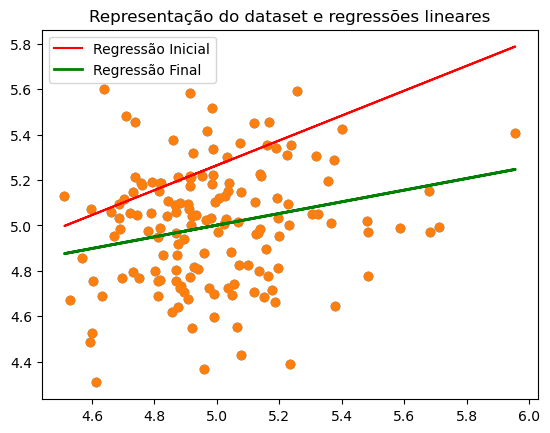

In [10]:
linear_regression(dataset[:,0], dataset[:,1], learning_rate = 0.01, n_iterations=50000)

## Aplicação prática da regressão

In [11]:
horas_estudo = np.array([8,0.5,2,3.4,9,13,10,3.7,8,7.7,14,11,4.8,3.7,12,1.75,6,9,8,15,5,6,7,8,9,10,11,12,13,14,15,0.75,1.75,2.4,3.9,5.84,6.95,5,8.75,9,11.5,13,16,12.85,13,14,10.5,13,12.75,10])

nota_exame = np.array([14,5,8,7.5,12,16,14,10,11,13,18,16,7.5,9,19,4.75,3.5,14,12.5,12,6,4.75,12,14,10,16.5,18,17,15.5,16,18,4.5,7,5,8,3.75,9,11,9.5,7.6,14.5,16,18.5,17.75,14.5,19,17,15.5,16,13])

In [12]:
horas_estudo.shape, nota_exame.shape

((50,), (50,))

A representação inicial de y_hat = 0.22535651454904204 x + 2.7021206042313644
Paragem na iteração 11328 porque as alterações em w e b já não são maiores do que 1e-12.
O ótimo da regressão está definido em y_hat = 0.9448042025018154 x + 3.8785286931499257


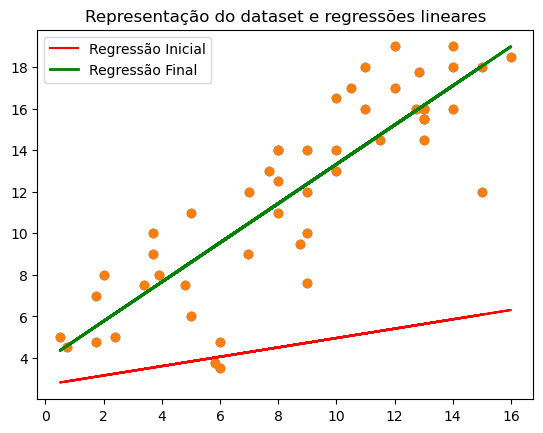

In [13]:
w, b, cost_history = linear_regression(horas_estudo,nota_exame, learning_rate = 0.01, n_iterations = 20000, min_error = 1e-12, min_update = 1e-12)

In [14]:
w, b

(0.9448042025018154, 3.8785286931499257)

In [16]:
nota_aluno = round(14 * 0.9448042025018154 + 3.8785286931499257,2)
nota_aluno

17.11